In [290]:
#The Objective of this assignment is to introduce students to rule mining techniques, particularly focusing on market basket analysis and provide hands on experience.

In [292]:
# Data Preprocessing:
#Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and converting the data to appropriate format.  


In [294]:
import warnings
warnings.filterwarnings('ignore')

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules,apriori
from mlxtend.preprocessing import TransactionEncoder

In [298]:
excel_sheets = pd.ExcelFile('Online retail.xlsx').sheet_names
print(excel_sheets)

['Sheet1']


In [299]:
df = pd.read_excel('Online retail.xlsx',sheet_name='Sheet1',header=None)

In [301]:
df

,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
...,...
7496,"butter,light mayo,fresh bread"
7497,"burgers,frozen vegetables,eggs,french fries,ma..."
7498,chicken
7499,"escalope,green tea"


In [302]:
# ideentify null values
df.isnull().sum()

0    0
dtype: int64

<Axes: xlabel='0'>

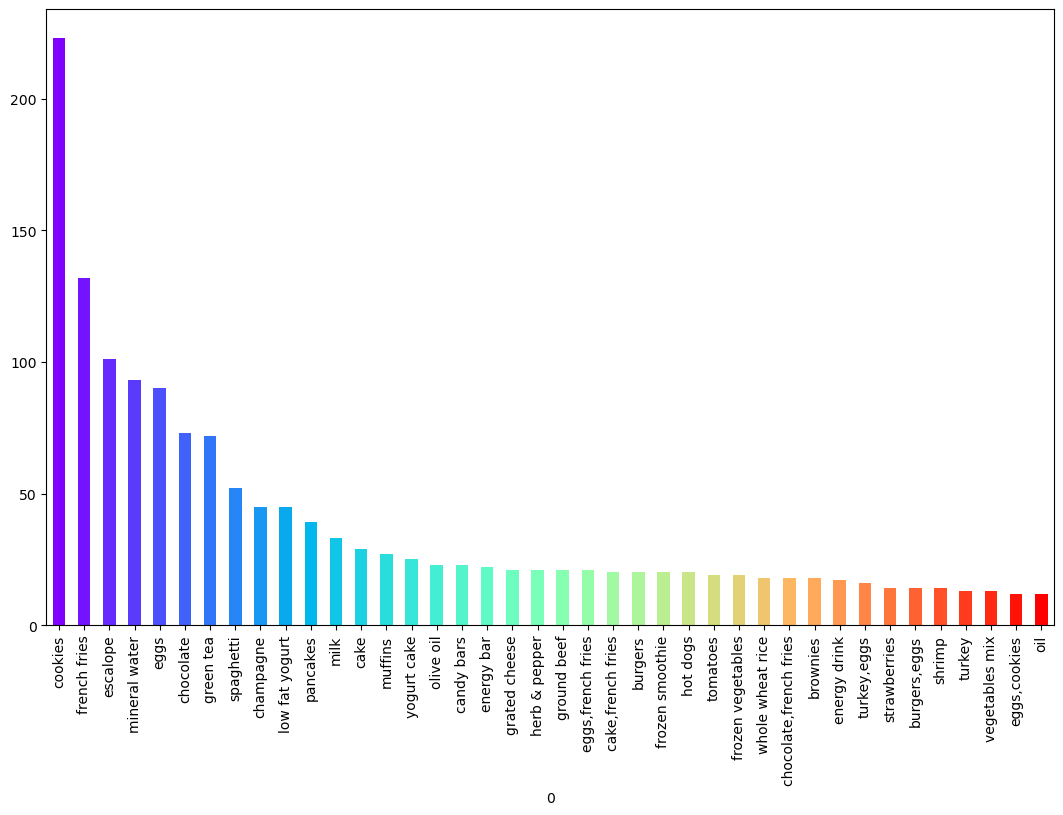

In [304]:
color = plt.cm.rainbow(np.linspace(0,1,40))
df[0].value_counts().head(40).plot.bar(figsize=(13,8),color=color)

In [307]:
# Split items into lists for each transaction
transactions = df[0].apply(lambda x: x.split(','))
transactions

0       [shrimp, almonds, avocado, vegetables mix, gre...
1                              [burgers, meatballs, eggs]
2                                               [chutney]
3                                       [turkey, avocado]
4       [mineral water, milk, energy bar, whole wheat ...
                              ...                        
7496                    [butter, light mayo, fresh bread]
7497    [burgers, frozen vegetables, eggs, french frie...
7498                                            [chicken]
7499                                [escalope, green tea]
7500    [eggs, frozen smoothie, yogurt cake, low fat y...
Name: 0, Length: 7501, dtype: object

In [308]:
# Use TransactionEncoder to transform the list of transactions into a one-hot encoded DataFrame
trans_enc = TransactionEncoder()

In [309]:
trans_enc_ary= trans_enc.fit(transactions).transform(transactions)
trans_enc_ary

array([[False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [310]:
df_encoded = pd.DataFrame(trans_enc_ary, columns=trans_enc.columns_)
df_encoded

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [312]:
df.shape

(7501, 1)

In [313]:
# Generate frequent itemsets using the apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(milk, ground beef, mineral water)"
253,0.017064,"(spaghetti, ground beef, mineral water)"
254,0.015731,"(spaghetti, milk, mineral water)"
255,0.010265,"(olive oil, spaghetti, mineral water)"


In [318]:
# Generate the association rules
association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113,0.413630
1,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
2,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080,0.420238
3,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198,0.417434
4,(burgers),(chocolate),0.087188,0.163845,0.017064,0.195719,1.194537,0.002779,1.039630,0.178411
...,...,...,...,...,...,...,...,...,...,...
401,"(spaghetti, pancakes)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557,0.488452
402,"(mineral water, pancakes)",(spaghetti),0.033729,0.174110,0.011465,0.339921,1.952333,0.005593,1.251198,0.504819
403,(spaghetti),"(mineral water, pancakes)",0.174110,0.033729,0.011465,0.065850,1.952333,0.005593,1.034385,0.590626
404,(mineral water),"(spaghetti, pancakes)",0.238368,0.025197,0.011465,0.048098,1.908923,0.005459,1.024059,0.625163


In [320]:
# interview_questions

# 1.	What is lift and why is it important in Association rules?
Lift measures the strength of an association rule by comparing how often two items occur together relative to if they were independent. A lift greater than 1 indicates a strong association, while a lift less than 1 shows a negative association.

Lift(A,B)= Support(A∩B)/(Support(A)×Support(B))
​


# 2.	What is support and Confidence. How do you calculate them?
Support is the frequency of an itemset appearing in the dataset, while confidence is the likelihood that item B is bought when item A is purchased. Support is calculated as the number of transactions containing an itemset divided by total transactions, while confidence is the support of both items together divided by the support of the first item.

Support(A)= Number of transactions containing A/Total number of transactions

​


# 3.	What are some limitations or challenges of Association rules mining?
Some limitations of association rule mining include high dimensionality, sparsity of data, challenges in interpretability, static analysis limitations, and difficulties in selecting appropriate support and confidence thresholds. These can lead to computational inefficiencies and difficulty extracting actionable insights.